## Results of the No null and No Imputation Data
<hr/>

</h3>We considered the data which has no null values and no imputation techniques used where all the values are dropped off....</h3>


<h4>        Aims and Goals of this Experiment</h4>
<ul>
    <li> What are MAPE and MAE scores of train and test data </li>
    <li> Levraging SARIMA models to capture seasonal difference </li>
</ul>
    

In [2]:
import pandas as pd
import numpy as np
import joblib
import pmdarima as pm
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
df1_train = pd.read_csv("../../../../main/sub_data/single_variant/inter-linear/train/train_inter-linear.csv",index_col='Date',parse_dates=True)
df1_test = pd.read_csv("../../../../main/sub_data/single_variant/inter-linear/test/test_inter-linear.csv",index_col='Date',parse_dates=True)

In [4]:
df1_train

,Max.Demand met during the day (MW)
Date,
2013-04-01,2776.0
2013-04-02,3034.0
2013-04-03,2991.0
2013-04-04,3125.0
2013-04-05,3160.0
...,...
2023-04-26,4445.0
2023-04-27,4626.0
2023-04-28,4395.0


In [5]:
def get_MAPE_MAE_test(dataframe,results):
    actual_values = np.array(dataframe)
    predicted_values = np.array(pd.DataFrame(results.forecast(len(actual_values)))["predicted_mean"])
    APE = np.abs((actual_values - predicted_values) / actual_values) * 100
    MAPE = np.mean(APE)
    MAE = np.mean(np.abs(results.resid))
    print("The MAPE Score is : ",MAPE)
    print("The MAE Score is :", MAE)
    return MAPE, MAE

def get_MAPE_MAE(dataframe,results):
    actual_values = np.array(dataframe)
    predicted_values = np.array(results.fittedvalues)
    APE = np.abs((actual_values - predicted_values) / actual_values) * 100
    MAPE = np.mean(APE)
    MAE = np.mean(np.abs(results.resid))
    print("The MAPE Score is : ",MAPE)
    print("The MAE Score is :", MAE)
    return MAPE, MAE



In [6]:
sarima_1 = SARIMAX(df1_train,order=(0,0,0),seasonal_order=(1,0,1,7)).fit()
print(sarima_1.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.61389D+00    |proj g|=  1.54849D-01

At iterate    5    f=  7.60195D+00    |proj g|=  1.97137D-03

At iterate   10    f=  7.60182D+00    |proj g|=  3.46186D-03


 This problem is unconstrained.



At iterate   15    f=  7.60181D+00    |proj g|=  1.91942D-03

At iterate   20    f=  7.60166D+00    |proj g|=  9.71392D-03

At iterate   25    f=  7.60160D+00    |proj g|=  5.80540D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     29      1     0     0   5.805D-06   7.602D+00
  F =   7.6016044721445750     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                          SARIMAX(1, 0, [

In [7]:
get_MAPE_MAE(df1_train,sarima_1)
print("--------------------------------------------------------------------")
get_MAPE_MAE_test(df1_test,sarima_1)

The MAPE Score is :  26.212657013708725
The MAE Score is : 359.9176732561132
--------------------------------------------------------------------
The MAPE Score is :  17.401003575574133
The MAE Score is : 359.9176732561132


(17.401003575574133, 359.9176732561132)

In [8]:
sarima_2 = SARIMAX(df1_train,order=(0,0,0),seasonal_order=(1,1,1,7)).fit()
print(sarima_2.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.58657D+00    |proj g|=  7.24412D-02

At iterate    5    f=  7.58360D+00    |proj g|=  7.83516D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     10      1     0     0   5.546D-06   7.584D+00
  F =   7.5835965113465109     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met dur

In [9]:
get_MAPE_MAE(df1_train,sarima_2)
print("--------------------------------------------------------------------")
get_MAPE_MAE_test(df1_test,sarima_2)

The MAPE Score is :  26.372266893176334
The MAE Score is : 359.0173504882623
--------------------------------------------------------------------
The MAPE Score is :  16.871285763378122
The MAE Score is : 359.0173504882623


(16.871285763378122, 359.0173504882623)

## Brute Force Approach without the non-seasonal Component

<p>This experiment only captures the non-seasonal component for the original df with the length of Seasonal Cycle 7</p>

    Inference Results
<ul>
<li>SARIMA(0,0,0)(3,0,6,7) has the highest and lowest AIC and BIC</li>
</ul>

In [10]:
# results1 = []
# for i in range(7):
#     for j in range(7):
#         try:
#             x = SARIMAX(df1_train,order=(0,0,0),seasonal_order=(i,0,j,7)).fit()
#             results1.append((i,j,x.aic,x.bic))
#         except:
#             results1.append(i,j,None,None)
# results1 = pd.DataFrame(results1,columns=['i','j','AIC','BIC'])
# results1.to_csv("sarima_results1.csv")

In [11]:
results1 = pd.read_csv("sarima_results1.csv")

In [12]:
results1.sort_values('AIC').head()

,Unnamed: 0,i,j,AIC,BIC
45,45,6,3,55773.403356,55835.515470
41,41,5,6,55773.671691,55848.206227
40,40,5,5,55779.547783,55847.871108
46,46,6,4,55835.729228,55904.052553
47,47,6,5,55838.249984,55912.784520


In [13]:
sarima_3 = SARIMAX(df1_train,order=(0,0,0),seasonal_order=(6,0,3,7)).fit()
print(sarima_3.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.60438D+00    |proj g|=  1.41938D-01

At iterate    5    f=  7.59046D+00    |proj g|=  1.26251D-02

At iterate   10    f=  7.58939D+00    |proj g|=  6.41316D-03

At iterate   15    f=  7.58825D+00    |proj g|=  6.98392D-03

At iterate   20    f=  7.58740D+00    |proj g|=  2.90108D-02

At iterate   25    f=  7.58170D+00    |proj g|=  2.25096D-02

At iterate   30    f=  7.57669D+00    |proj g|=  5.85703D-02

At iterate   35    f=  7.57175D+00    |proj g|=  1.39078D-02

At iterate   40    f=  7.57140D+00    |proj g|=  2.13727D-03

At iterate   45    f=  7.57128D+00    |proj g|=  2.94243D-02

At iterate   50    f=  7.57108D+00    |proj g|=  3.09194D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                    SARIMAX(6, 0, [1, 2, 3], 7)   Log Likelihood              -27876.702
Date:                                Fri, 21 Jul 2023   AIC                          55773.403
Time:                                        22:41:01   BIC                          55835.515
Sample:                                    04-01-2013   HQIC                         55795.513
                                         - 04-30-2023                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7        1.5340      0.056     27.385      0.000       1.424       1.644
ar.

In [14]:
get_MAPE_MAE(df1_train,sarima_3)
print("--------------------------------------------------------------------")
get_MAPE_MAE_test(df1_test,sarima_3)

The MAPE Score is :  26.42519995292293
The MAE Score is : 336.53489708199567
--------------------------------------------------------------------
The MAPE Score is :  15.304119441481912
The MAE Score is : 336.53489708199567


(15.304119441481912, 336.53489708199567)

In [15]:
sarima_4 = SARIMAX(df1_train,order=(0,0,0),seasonal_order=(6,1,3,7)).fit()
print(sarima_4.summary())

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.58662D+00    |proj g|=  1.37846D-01

At iterate    5    f=  7.57350D+00    |proj g|=  1.48631D-02

At iterate   10    f=  7.57174D+00    |proj g|=  3.99376D-04

At iterate   15    f=  7.57174D+00    |proj g|=  6.55897D-04

At iterate   20    f=  7.57166D+00    |proj g|=  1.08431D-02

At iterate   25    f=  7.56990D+00    |proj g|=  4.57289D-02

At iterate   30    f=  7.56298D+00    |proj g|=  8.86260D-03

At iterate   35    f=  7.56070D+00    |proj g|=  6.54172D-03

At iterate   40    f=  7.55666D+00    |proj g|=  4.59393D-02

At iterate   45    f=  7.55166D+00    |proj g|=  5.22645D-03


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  7.55130D+00    |proj g|=  9.95905D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     70      1     0     0   9.959D-03   7.551D+00
  F =   7.5513044512336984     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                                       SARIMAX Results                                        
Dep. Variable:     Max.Demand met during the day (MW)   No. Observations:                 3682
Model:                    SARIMAX(6, 1, [1, 2, 3], 7)   Log Likelihood              -27803.903
Date:                                Fri, 21 Jul 2023   AIC                 

In [16]:
get_MAPE_MAE(df1_train,sarima_4)
print("--------------------------------------------------------------------")
get_MAPE_MAE_test(df1_test,sarima_4)

The MAPE Score is :  26.44254270617914
The MAE Score is : 339.2704180564676
--------------------------------------------------------------------
The MAPE Score is :  15.210082053918544
The MAE Score is : 339.2704180564676


(15.210082053918544, 339.2704180564676)

## Find P and Q for S

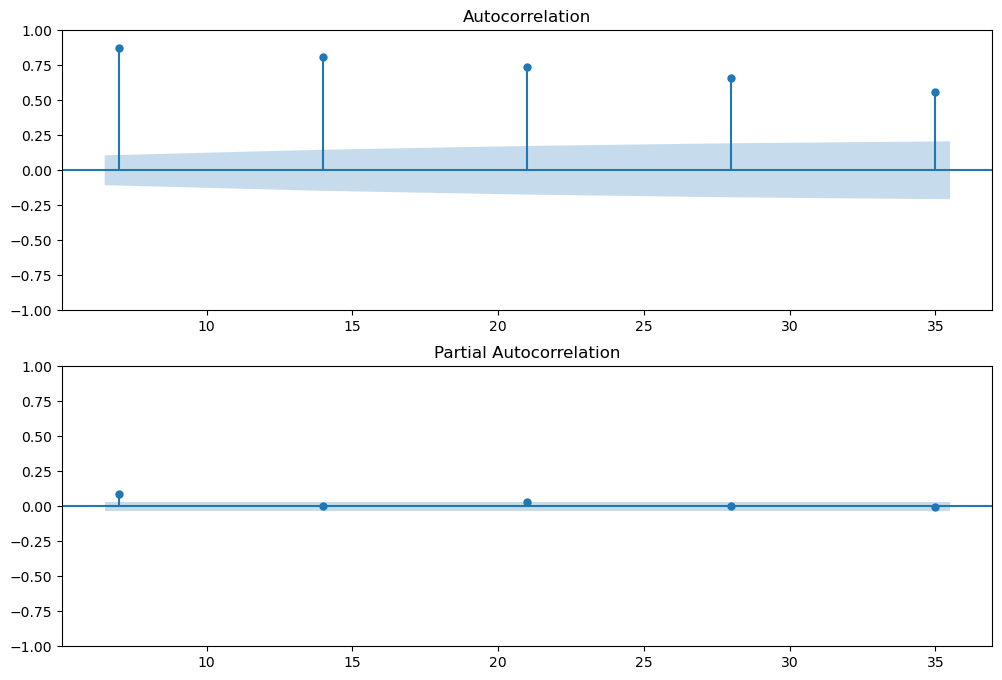

In [17]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(12,8))
plot_acf(df1_train,lags=[7,14,21,28,35],zero=False,ax=ax1)
plot_pacf(df1_train,lags=[7,14,21,28,35],zero=False,ax=ax2)
plt.show()

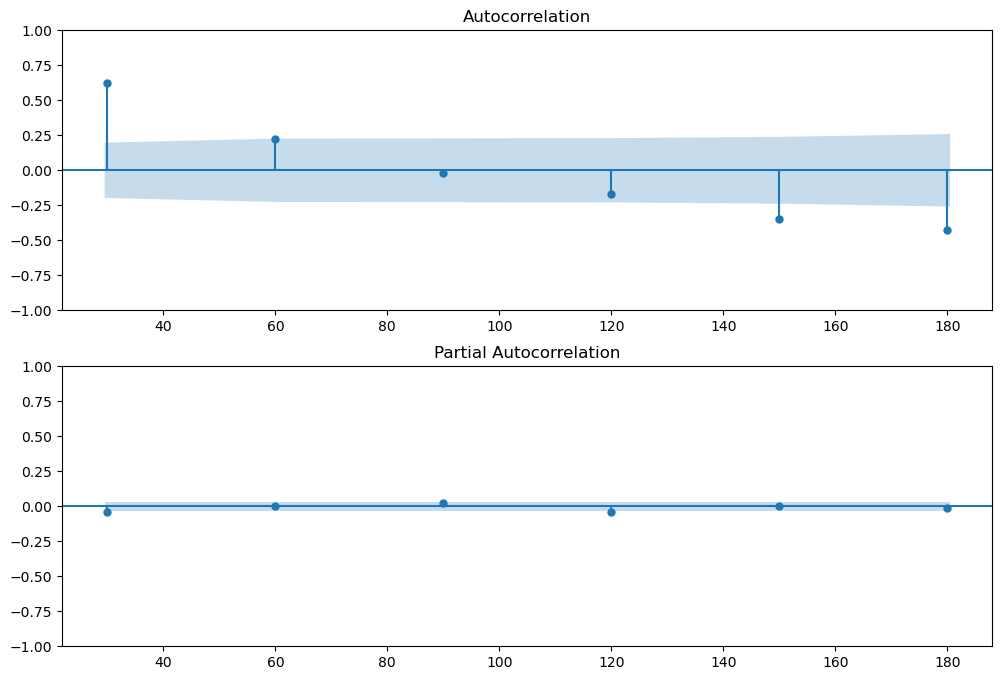

In [18]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(12,8))
plot_acf(df1_train,lags=[30,60,90,120,150,180],zero=False,ax=ax1)
plot_pacf(df1_train,lags=[30,60,90,120,150,180],zero=False,ax=ax2)
plt.show()

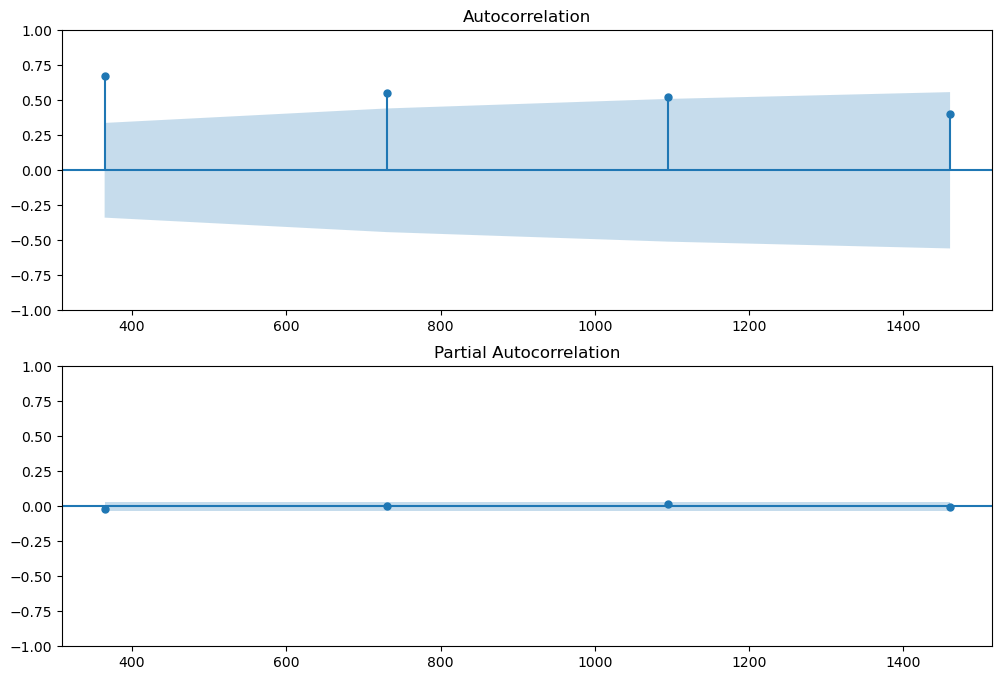

In [19]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(12,8))
plot_acf(df1_train,lags=[365,730,1095,1460],zero=False,ax=ax1)
plot_pacf(df1_train,lags=[365,730,1095,1460],zero=False,ax=ax2)
plt.show()

In [20]:
orders = [(1,0,0),(2,0,0),(1,1,0),(1,2,0),(0,0,1),(0,1,1),(0,2,1),(8,0,8),(8,1,8),(9,0,7),(9,1,7),(8,0,9),(8,1,9)]
results2 = []
for o in orders:
    try:
        res = SARIMAX(df1_train,orders=o,seasonal_order=(6,0,3,7)).fit()
        results2.append((3,6,res.aic,res.bic,get_MAPE_MAE(df1_train,res)[0],get_MAPE_MAE(df1_train,res)[1],get_MAPE_MAE_test(df1_test,res)[0],get_MAPE_MAE_test(df1_test,res)[1]))
    except:
        results2.append((3,6,None,None,None,None,None,None))
results2 = pd.DataFrame(results2,columns=['P','Q','AIC','BIC','MAPE_train','MAE_test','MAPE_test','MAE_test'])

/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['orders']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.06968D+00    |proj g|=  2.92894D-01


 This problem is unconstrained.



At iterate    5    f=  6.92055D+00    |proj g|=  1.88107D-02

At iterate   10    f=  6.91669D+00    |proj g|=  1.15779D-03

At iterate   15    f=  6.91632D+00    |proj g|=  1.13286D-02

At iterate   20    f=  6.91558D+00    |proj g|=  7.28998D-04

At iterate   25    f=  6.91549D+00    |proj g|=  6.29292D-03

At iterate   30    f=  6.91406D+00    |proj g|=  2.21634D-02

At iterate   35    f=  6.91314D+00    |proj g|=  1.32072D-02

At iterate   40    f=  6.91270D+00    |proj g|=  4.87040D-03

At iterate   45    f=  6.91240D+00    |proj g|=  2.27397D-02


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  6.91142D+00    |proj g|=  2.51455D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     61      1     0     0   2.515D-02   6.911D+00
  F =   6.9114200309706479     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
The MAPE Score is :  26.556703263721076
The MAE Score is : 167.0327075594457
The MAPE Score is :  26.556703263721076
The MAE Score is : 167.0327075594457
The MAPE Score is :  19.905056225091265
The MAE Score is : 167.0327075594457
The MAPE Score is :  19.905056225091265
The MAE Score is : 167.0327075594457


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['orders']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.06968D+00    |proj g|=  2.92894D-01

At iterate    5    f=  6.92055D+00    |proj g|=  1.88107D-02

At iterate   10    f=  6.91669D+00    |proj g|=  1.15779D-03

At iterate   15    f=  6.91632D+00    |proj g|=  1.13286D-02

At iterate   20    f=  6.91558D+00    |proj g|=  7.28998D-04

At iterate   25    f=  6.91549D+00    |proj g|=  6.29292D-03

At iterate   30    f=  6.91406D+00    |proj g|=  2.21634D-02

At iterate   35    f=  6.91314D+00    |proj g|=  1.32072D-02

At iterate   40    f=  6.91270D+00    |proj g|=  4.87040D-03

At iterate   45    f=  6.91240D+00    |proj g|=  2.27397D-02


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  6.91142D+00    |proj g|=  2.51455D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     61      1     0     0   2.515D-02   6.911D+00
  F =   6.9114200309706479     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
The MAPE Score is :  26.556703263721076
The MAE Score is : 167.0327075594457
The MAPE Score is :  26.556703263721076
The MAE Score is : 167.0327075594457
The MAPE Score is :  19.905056225091265
The MAE Score is : 167.0327075594457
The MAPE Score is :  19.905056225091265
The MAE Score is : 167.0327075594457


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['orders']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.06968D+00    |proj g|=  2.92894D-01


 This problem is unconstrained.



At iterate    5    f=  6.92055D+00    |proj g|=  1.88107D-02

At iterate   10    f=  6.91669D+00    |proj g|=  1.15779D-03

At iterate   15    f=  6.91632D+00    |proj g|=  1.13286D-02

At iterate   20    f=  6.91558D+00    |proj g|=  7.28998D-04

At iterate   25    f=  6.91549D+00    |proj g|=  6.29292D-03

At iterate   30    f=  6.91406D+00    |proj g|=  2.21634D-02

At iterate   35    f=  6.91314D+00    |proj g|=  1.32072D-02

At iterate   40    f=  6.91270D+00    |proj g|=  4.87040D-03

At iterate   45    f=  6.91240D+00    |proj g|=  2.27397D-02


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  6.91142D+00    |proj g|=  2.51455D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     61      1     0     0   2.515D-02   6.911D+00
  F =   6.9114200309706479     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
The MAPE Score is :  26.556703263721076
The MAE Score is : 167.0327075594457
The MAPE Score is :  26.556703263721076
The MAE Score is : 167.0327075594457
The MAPE Score is :  19.905056225091265
The MAE Score is : 167.0327075594457
The MAPE Score is :  19.905056225091265
The MAE Score is : 167.0327075594457


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['orders']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.06968D+00    |proj g|=  2.92894D-01


 This problem is unconstrained.



At iterate    5    f=  6.92055D+00    |proj g|=  1.88107D-02

At iterate   10    f=  6.91669D+00    |proj g|=  1.15779D-03

At iterate   15    f=  6.91632D+00    |proj g|=  1.13286D-02

At iterate   20    f=  6.91558D+00    |proj g|=  7.28998D-04

At iterate   25    f=  6.91549D+00    |proj g|=  6.29292D-03

At iterate   30    f=  6.91406D+00    |proj g|=  2.21634D-02

At iterate   35    f=  6.91314D+00    |proj g|=  1.32072D-02

At iterate   40    f=  6.91270D+00    |proj g|=  4.87040D-03

At iterate   45    f=  6.91240D+00    |proj g|=  2.27397D-02


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  6.91142D+00    |proj g|=  2.51455D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     61      1     0     0   2.515D-02   6.911D+00
  F =   6.9114200309706479     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
The MAPE Score is :  26.556703263721076
The MAE Score is : 167.0327075594457
The MAPE Score is :  26.556703263721076
The MAE Score is : 167.0327075594457
The MAPE Score is :  19.905056225091265
The MAE Score is : 167.0327075594457
The MAPE Score is :  19.905056225091265
The MAE Score is : 167.0327075594457


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['orders']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.06968D+00    |proj g|=  2.92894D-01

At iterate    5    f=  6.92055D+00    |proj g|=  1.88107D-02

At iterate   10    f=  6.91669D+00    |proj g|=  1.15779D-03

At iterate   15    f=  6.91632D+00    |proj g|=  1.13286D-02

At iterate   20    f=  6.91558D+00    |proj g|=  7.28998D-04

At iterate   25    f=  6.91549D+00    |proj g|=  6.29292D-03

At iterate   30    f=  6.91406D+00    |proj g|=  2.21634D-02

At iterate   35    f=  6.91314D+00    |proj g|=  1.32072D-02

At iterate   40    f=  6.91270D+00    |proj g|=  4.87040D-03

At iterate   45    f=  6.91240D+00    |proj g|=  2.27397D-02


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  6.91142D+00    |proj g|=  2.51455D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     61      1     0     0   2.515D-02   6.911D+00
  F =   6.9114200309706479     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
The MAPE Score is :  26.556703263721076
The MAE Score is : 167.0327075594457
The MAPE Score is :  26.556703263721076
The MAE Score is : 167.0327075594457
The MAPE Score is :  19.905056225091265
The MAE Score is : 167.0327075594457
The MAPE Score is :  19.905056225091265
The MAE Score is : 167.0327075594457


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['orders']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.06968D+00    |proj g|=  2.92894D-01


 This problem is unconstrained.



At iterate    5    f=  6.92055D+00    |proj g|=  1.88107D-02

At iterate   10    f=  6.91669D+00    |proj g|=  1.15779D-03

At iterate   15    f=  6.91632D+00    |proj g|=  1.13286D-02

At iterate   20    f=  6.91558D+00    |proj g|=  7.28998D-04

At iterate   25    f=  6.91549D+00    |proj g|=  6.29292D-03

At iterate   30    f=  6.91406D+00    |proj g|=  2.21634D-02

At iterate   35    f=  6.91314D+00    |proj g|=  1.32072D-02

At iterate   40    f=  6.91270D+00    |proj g|=  4.87040D-03

At iterate   45    f=  6.91240D+00    |proj g|=  2.27397D-02


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  6.91142D+00    |proj g|=  2.51455D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     61      1     0     0   2.515D-02   6.911D+00
  F =   6.9114200309706479     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
The MAPE Score is :  26.556703263721076
The MAE Score is : 167.0327075594457
The MAPE Score is :  26.556703263721076
The MAE Score is : 167.0327075594457
The MAPE Score is :  19.905056225091265
The MAE Score is : 167.0327075594457
The MAPE Score is :  19.905056225091265
The MAE Score is : 167.0327075594457


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['orders']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.06968D+00    |proj g|=  2.92894D-01


 This problem is unconstrained.



At iterate    5    f=  6.92055D+00    |proj g|=  1.88107D-02

At iterate   10    f=  6.91669D+00    |proj g|=  1.15779D-03

At iterate   15    f=  6.91632D+00    |proj g|=  1.13286D-02

At iterate   20    f=  6.91558D+00    |proj g|=  7.28998D-04

At iterate   25    f=  6.91549D+00    |proj g|=  6.29292D-03

At iterate   30    f=  6.91406D+00    |proj g|=  2.21634D-02

At iterate   35    f=  6.91314D+00    |proj g|=  1.32072D-02

At iterate   40    f=  6.91270D+00    |proj g|=  4.87040D-03

At iterate   45    f=  6.91240D+00    |proj g|=  2.27397D-02


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  6.91142D+00    |proj g|=  2.51455D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     61      1     0     0   2.515D-02   6.911D+00
  F =   6.9114200309706479     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
The MAPE Score is :  26.556703263721076
The MAE Score is : 167.0327075594457
The MAPE Score is :  26.556703263721076
The MAE Score is : 167.0327075594457
The MAPE Score is :  19.905056225091265
The MAE Score is : 167.0327075594457
The MAPE Score is :  19.905056225091265
The MAE Score is : 167.0327075594457


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['orders']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.06968D+00    |proj g|=  2.92894D-01


 This problem is unconstrained.



At iterate    5    f=  6.92055D+00    |proj g|=  1.88107D-02

At iterate   10    f=  6.91669D+00    |proj g|=  1.15779D-03

At iterate   15    f=  6.91632D+00    |proj g|=  1.13286D-02

At iterate   20    f=  6.91558D+00    |proj g|=  7.28998D-04

At iterate   25    f=  6.91549D+00    |proj g|=  6.29292D-03

At iterate   30    f=  6.91406D+00    |proj g|=  2.21634D-02

At iterate   35    f=  6.91314D+00    |proj g|=  1.32072D-02

At iterate   40    f=  6.91270D+00    |proj g|=  4.87040D-03

At iterate   45    f=  6.91240D+00    |proj g|=  2.27397D-02


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  6.91142D+00    |proj g|=  2.51455D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     61      1     0     0   2.515D-02   6.911D+00
  F =   6.9114200309706479     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
The MAPE Score is :  26.556703263721076
The MAE Score is : 167.0327075594457
The MAPE Score is :  26.556703263721076
The MAE Score is : 167.0327075594457
The MAPE Score is :  19.905056225091265
The MAE Score is : 167.0327075594457
The MAPE Score is :  19.905056225091265
The MAE Score is : 167.0327075594457


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['orders']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.06968D+00    |proj g|=  2.92894D-01

At iterate    5    f=  6.92055D+00    |proj g|=  1.88107D-02

At iterate   10    f=  6.91669D+00    |proj g|=  1.15779D-03

At iterate   15    f=  6.91632D+00    |proj g|=  1.13286D-02

At iterate   20    f=  6.91558D+00    |proj g|=  7.28998D-04

At iterate   25    f=  6.91549D+00    |proj g|=  6.29292D-03

At iterate   30    f=  6.91406D+00    |proj g|=  2.21634D-02

At iterate   35    f=  6.91314D+00    |proj g|=  1.32072D-02

At iterate   40    f=  6.91270D+00    |proj g|=  4.87040D-03

At iterate   45    f=  6.91240D+00    |proj g|=  2.27397D-02


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  6.91142D+00    |proj g|=  2.51455D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     61      1     0     0   2.515D-02   6.911D+00
  F =   6.9114200309706479     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
The MAPE Score is :  26.556703263721076
The MAE Score is : 167.0327075594457
The MAPE Score is :  26.556703263721076
The MAE Score is : 167.0327075594457
The MAPE Score is :  19.905056225091265
The MAE Score is : 167.0327075594457
The MAPE Score is :  19.905056225091265
The MAE Score is : 167.0327075594457


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['orders']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.06968D+00    |proj g|=  2.92894D-01


 This problem is unconstrained.



At iterate    5    f=  6.92055D+00    |proj g|=  1.88107D-02

At iterate   10    f=  6.91669D+00    |proj g|=  1.15779D-03

At iterate   15    f=  6.91632D+00    |proj g|=  1.13286D-02

At iterate   20    f=  6.91558D+00    |proj g|=  7.28998D-04

At iterate   25    f=  6.91549D+00    |proj g|=  6.29292D-03

At iterate   30    f=  6.91406D+00    |proj g|=  2.21634D-02

At iterate   35    f=  6.91314D+00    |proj g|=  1.32072D-02

At iterate   40    f=  6.91270D+00    |proj g|=  4.87040D-03

At iterate   45    f=  6.91240D+00    |proj g|=  2.27397D-02


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  6.91142D+00    |proj g|=  2.51455D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     61      1     0     0   2.515D-02   6.911D+00
  F =   6.9114200309706479     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
The MAPE Score is :  26.556703263721076
The MAE Score is : 167.0327075594457
The MAPE Score is :  26.556703263721076
The MAE Score is : 167.0327075594457
The MAPE Score is :  19.905056225091265
The MAE Score is : 167.0327075594457
The MAPE Score is :  19.905056225091265
The MAE Score is : 167.0327075594457


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['orders']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.06968D+00    |proj g|=  2.92894D-01


 This problem is unconstrained.



At iterate    5    f=  6.92055D+00    |proj g|=  1.88107D-02

At iterate   10    f=  6.91669D+00    |proj g|=  1.15779D-03

At iterate   15    f=  6.91632D+00    |proj g|=  1.13286D-02

At iterate   20    f=  6.91558D+00    |proj g|=  7.28998D-04

At iterate   25    f=  6.91549D+00    |proj g|=  6.29292D-03

At iterate   30    f=  6.91406D+00    |proj g|=  2.21634D-02

At iterate   35    f=  6.91314D+00    |proj g|=  1.32072D-02

At iterate   40    f=  6.91270D+00    |proj g|=  4.87040D-03

At iterate   45    f=  6.91240D+00    |proj g|=  2.27397D-02


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  6.91142D+00    |proj g|=  2.51455D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     61      1     0     0   2.515D-02   6.911D+00
  F =   6.9114200309706479     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
The MAPE Score is :  26.556703263721076
The MAE Score is : 167.0327075594457
The MAPE Score is :  26.556703263721076
The MAE Score is : 167.0327075594457
The MAPE Score is :  19.905056225091265
The MAE Score is : 167.0327075594457
The MAPE Score is :  19.905056225091265
The MAE Score is : 167.0327075594457


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['orders']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.06968D+00    |proj g|=  2.92894D-01


 This problem is unconstrained.



At iterate    5    f=  6.92055D+00    |proj g|=  1.88107D-02

At iterate   10    f=  6.91669D+00    |proj g|=  1.15779D-03

At iterate   15    f=  6.91632D+00    |proj g|=  1.13286D-02

At iterate   20    f=  6.91558D+00    |proj g|=  7.28998D-04

At iterate   25    f=  6.91549D+00    |proj g|=  6.29292D-03

At iterate   30    f=  6.91406D+00    |proj g|=  2.21634D-02

At iterate   35    f=  6.91314D+00    |proj g|=  1.32072D-02

At iterate   40    f=  6.91270D+00    |proj g|=  4.87040D-03

At iterate   45    f=  6.91240D+00    |proj g|=  2.27397D-02


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  6.91142D+00    |proj g|=  2.51455D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     61      1     0     0   2.515D-02   6.911D+00
  F =   6.9114200309706479     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
The MAPE Score is :  26.556703263721076
The MAE Score is : 167.0327075594457
The MAPE Score is :  26.556703263721076
The MAE Score is : 167.0327075594457
The MAPE Score is :  19.905056225091265
The MAE Score is : 167.0327075594457
The MAPE Score is :  19.905056225091265
The MAE Score is : 167.0327075594457


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['orders']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.06968D+00    |proj g|=  2.92894D-01

At iterate    5    f=  6.92055D+00    |proj g|=  1.88107D-02

At iterate   10    f=  6.91669D+00    |proj g|=  1.15779D-03

At iterate   15    f=  6.91632D+00    |proj g|=  1.13286D-02

At iterate   20    f=  6.91558D+00    |proj g|=  7.28998D-04

At iterate   25    f=  6.91549D+00    |proj g|=  6.29292D-03

At iterate   30    f=  6.91406D+00    |proj g|=  2.21634D-02

At iterate   35    f=  6.91314D+00    |proj g|=  1.32072D-02

At iterate   40    f=  6.91270D+00    |proj g|=  4.87040D-03

At iterate   45    f=  6.91240D+00    |proj g|=  2.27397D-02


/Users/sujaykumar/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  6.91142D+00    |proj g|=  2.51455D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     61      1     0     0   2.515D-02   6.911D+00
  F =   6.9114200309706479     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
The MAPE Score is :  26.556703263721076
The MAE Score is : 167.0327075594457
The MAPE Score is :  26.556703263721076
The MAE Score is : 167.0327075594457
The MAPE Score is :  19.905056225091265
The MAE Score is : 167.0327075594457
The MAPE Score is :  19.905056225091265
The MAE Score is : 167.0327075594457


In [21]:
results2.to_csv("sarima_results2.csv")